In [3]:
import cv2
import numpy as np 
import math as mt
import os 
from skimage.measure import compare_ssim
import argparse
import imutils
import scipy.signal as signal
import matplotlib.pylab as plt
import time



In [5]:
mono = cv2.IMREAD_GRAYSCALE
poly = cv2.IMREAD_COLOR
path1 ='./pan/' 

In [6]:
img = cv2.imread( path1 + '/0002.png', mono) 
img.shape

(512, 512)

In [ ]:
stride = 1
size = 3
max_similar = 20
max_distance = 1000
h = 50 
clst = np.zeros((img.shape[0], img.shape[1], 2, max_similar))
for i in range( size//2, img.shape[0] - size//2, stride):
    print('{}th iteration in progress'.format(i) )
    
    start_epoch = time.time()

print("--- %s seconds ---" % (time.time() - start_epoch))
    for j in range( size//2, img.shape[1] - size//2, stride):
# for i in range( size//2, size//2+1):
#     for j in range( size//2, size//2+1):
#         print(img[i, j])
        if ( j%10 == 0):
            print(j, end = ' ')

        cl = {}
        con  = np.asarray(img[i-size//2 :i+size//2+1 ,j-size//2 : j + size//2 +1 ], dtype=np.float32)
        for a in range( size//2, img.shape[0] - size//2, stride):
            for b in range( size//2, img.shape[1] - size//2, stride):
                crt = np.asarray(img[ a - size//2 : a + size//2 + 1 , b - size//2 : b + size//2 +1 ], dtype=np.float32)
                f2 = np.linalg.norm(con - crt, ord ='fro')
                cl[(a,b)] = f2
        cl = dict( sorted(cl.items(), key=lambda item: item[1])[:max_similar])# сортировка и ограничение на число соседей
        cl = { k: v for k,v in cl.items() if v < max_distance} # если вводить ограничения на максимальную дистанцию
#         {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}
        cl_ind =[ k[0] for k in cl.items()]
        cl_ind = np.array([img[ind[0], ind[1]] for ind in cl_ind])
        cl_koef = np.array([ np.exp(-v[1]**2/h**2) for v in cl.items()])
        img[i, j] = cl_ind @ cl_koef / cl_koef.sum()
#         print(cl_ind @ cl_koef)
#         print(cl_koef.sum())
#         print(img[i, j]) 
    print('Epoch {} takes {} seconds',format(i, time.time() - start_epoch))
            
# plt.hist(dist)
# print(cl.items())
# for key, v  in cl.items():
#     print('Pixel{} has distance {}'.format( key, v))
# print(len(cl_ind))
# # print([k[1]  for k in cl.items()])
# print(cl_koef)
# print(cl_ind)

1th iteration in progress
10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 2th iteration in progress
10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 3th iteration in progress
10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 4th iteration in progress
10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 5th iteration in progress
10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250

In [7]:
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 10)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

In [15]:
stride = 1
size = 3
max_similar = 20
max_distance = 1000
h = 50 
img = img[:100, :100]
ImgVec = np.zeros((img.shape[0]*img.shape[1], size**2)).astype(np.uint8)
# padImg  = np.pad(img, 1, pad_with, padder = 0)
padImg  = np.pad(img, 1,'symmetric')
for i in range( 1, img.shape[0], stride):
    for j in range( 1, img.shape[1], stride):
        ImgVec[i*j,:] = np.asarray(padImg[i-size//2 :i+size//2+1 ,j-size//2 : j + size//2 +1 ], dtype=np.uint8).ravel()
x_y = np.dot(ImgVec.astype(np.uint16), ImgVec.astype(np.uint16).T)
xx = np.sum(ImgVec.astype(np.uint16)**2, axis = 1)

dists = np.sqrt(-2*x_y + np.matrix(xx).T + np.matrix(xx))  
# dists = np.sqrt(np.dot(ImgVec, ImgVec.T))
max_dists = np.amax(dists, axis = 1 )
# koef = np.exp(-(dists - np.matrix(max_dists).T)**2/h**2)
koef = np.exp(-(dists)**2/h**2)
new_img = np.divide( koef @ np.matrix(img.ravel()).T ,  np.matrix(koef.sum(axis = 1)) )
new_img = new_img.reshape(img.shape).astype(np.uint8) 

C:\Users\Aleksandr\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


In [12]:
new_img.max()


0

In [16]:
cv2.imshow("Image", new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
# print(koef.shape, (koef @ img.ravel().T).shape, koef.sum(axis = 1).shape )
# koef 
np.matrix(max_dists).shape

(10000, 1)

In [17]:
print(np.amax(dists))  
(ImgVec[35]* ImgVec[1]).sum() 
print((ImgVec[35].astype(np.float32)**2))
print(ImgVec[35]) 

518.2566931550426
[1.024e+03 1.024e+03 1.024e+03 4.900e+01 4.900e+01 4.900e+01 1.000e+00
 1.000e+00 1.000e+00]
[32 32 32  7  7  7  1  1  1]


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10000 BarContainer objects>)

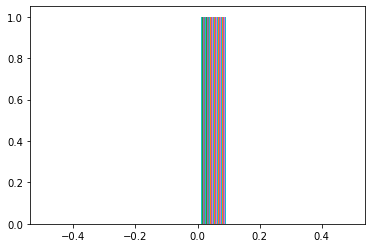

In [18]:
plt.hist(koef[0])

In [82]:
( np.matrix(koef.sum(axis = 1)) ).shape

(1, 10000)

In [47]:
new_img =  koef @ img.ravel().reshape(img.ravel().shape[0], 1) / koef.sum(axis = 1)

In [14]:
# new_img.reshape(img.shape) 
# koef.sum(axis = 1)
koef @ img.ravel().reshape(img.ravel().shape[0], 1) 
img.ravel().reshape(img.ravel().shape[0], 1)
koef
print(dists[1,35], koef[1,35],xx[1], xx[35], x_y[1,35], ( np.matrix(xx).T + np.matrix(xx) )[1,35]) 

nan nan 40 150 236 190


In [ ]:
xx.shape

In [31]:
cv2.imwrite('one_str.jpg', new_img)

True

In [73]:
i, j = np.where(np.isnan(dists)) 
print(i)
print(j) 


[]
[]


In [131]:
a = np.array([[1,2,3],[2,3,4],[3,4,5]])
ind = [(0,0),(2,2)]
# [a[i] for i in ind]
# type(ind)
for i in ind: 
    print("NEw",i) 
print(len(ind))    
# [a[i[0]][i[1]] for i in ind ] 
[a[i[0],i[1]] for i in ind ]

NEw (0, 0)
NEw (2, 2)
2


[1, 5]